# Term Frequency Analysis
In this part we analyise the more frequent word.

In [1]:
!python -m pip install json-lines

In [21]:
import json_lines

with open('Illinois-20200302-xml/data/data.jsonl/data.jsonl', 'rb') as f: # opening file in binary(rb) mode 
    df = list(json_lines.reader(f))
    for item in json_lines.reader(f):
        print(item)
        break

In [22]:
import json

tot = len(df)
json_list = []

for n in range(0,tot):
    json_list.append(json.dumps(df[n]['casebody']))

In [23]:
del df

In [24]:
import re
import nltk
import json
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Convert words to lower case
    text = text.lower() 

    text = re.sub('<.*?>', ' ', text)
    text = re.sub('[a-zA-Z]+\\\\[a-zA-Z]+', ' ', text)
    text = re.sub('\\\\[a-zA-Z]+', ' ', text)
    text = re.sub('\\\\"', '"', text)
    text = re.sub('[0-9]+[a-zA-Z]+', '', text)
    text = re.sub('\*', '', text)
    text = re.sub('amp', '', text)
    text = re.sub('[0-9]+', '', text)
    
    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([i for i in text.split() if i not in stop_words])
    
    #Remove punctuation
    words = nltk.word_tokenize(text)
    text = [word for word in words if word.isalnum()]

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## TF-IDF


In [25]:
texts1 = []

for sentence in json_list:
    tmp = clean_text(sentence)
    for elem in tmp:
        texts1.append(elem)

In [26]:
from collections import Counter
from math import log
from nltk import word_tokenize
from nltk.corpus import brown

nltk.download('brown')

tf = Counter(texts1)
n = len(brown.words())
for word in tf:
    tf[word] *= log(n / (tf[word] + 1))    # TF-IDF

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [37]:
for word, score in tf.most_common(10):
    print('%8.2f %s' % (score, word))

427139.55 whether
427016.78 error
427009.97 illinois
426959.04 appeal
426918.08 motion
426793.69 could
426644.58 first
426496.84 counsel
426434.15 question
426334.80 appellant


In [38]:
top = tf.most_common(1)

## Relevant term by subject of interest

In [10]:
narcotics = ['cannabis', 'cocaine', 'methamphetamine', 'smart drugs', 'marijuana', 'MDMA', 'LSD', 'KETAMINA', 'heroin', 'fentanyl']
weapons = ['gun', 'knife', 'weapon', 'firearm', 'rifle', 'carabine', 'shotgun', 'assaults rifle', 'sword', 'blunt objects'] 
investigation = ['gang', 'mafia', 'serial kiler', 'rape', 'thefts', 'recidivism', 'arrest', 'ethnicity', 'caucasian', 'afroamerican', 'native american', 'hispanic', 'gender', 'male', 'female', 'man', 'woman', 'girl', 'boy', 'robbery', 'cybercrime']

In [21]:
narcoticsDict = {}
weaponsDict = {}
investigationDict = {}
for word in narcotics:
    #print('%8.2f %s' % (tf[word], word))
    narcoticsDict[word] = tf[word]
for word in weapons:
    #print('%8.2f %s' % (tf[word], word))
    weaponsDict[word] = tf[word]
for word in investigation:
    #print('%8.2f %s' % (tf[word], word))
    investigationDict[word] = tf[word]
    
narcoticsDict = {k: v for k, v in sorted(narcoticsDict.items(), key=lambda item: -item[1])}
weaponsDict = {k: v for k, v in sorted(weaponsDict.items(), key=lambda item: -item[1])}
investigationDict = {k: v for k, v in sorted(investigationDict.items(), key=lambda item: -item[1])}

In [32]:
for word in narcoticsDict:
    print('%8.2f %s %8.2f' % (narcoticsDict[word], word, top[0][1]-narcoticsDict[word]))

78790.93 cocaine 348348.62
38950.94 cannabis 388188.61
37253.07 marijuana 389886.48
30791.07 heroin 396348.47
   83.20 fentanyl 427056.35
    0.00 methamphetamine 427139.55
    0.00 smart drugs 427139.55
    0.00 MDMA 427139.55
    0.00 LSD 427139.55
    0.00 KETAMINA 427139.55


In [34]:
for word in weaponsDict:
    print('%8.2f %s %8.2f' % (weaponsDict[word], word, top[0][1]-weaponsDict[word]))

159020.97 gun 268118.58
85831.46 weapon 341308.08
65316.64 knife 361822.90
42583.54 firearm 384556.01
32449.91 shotgun 394689.63
16244.95 rifle 410894.59
 3479.15 sword 423660.39
    0.00 carabine 427139.55
    0.00 assaults rifle 427139.55
    0.00 blunt objects 427139.55


In [35]:
for word in investigationDict:
    print('%8.2f %s %8.2f' % (investigationDict[word], word, top[0][1]-investigationDict[word]))

203715.38 arrest 223424.17
198729.30 man 228410.25
166304.48 robbery 260835.06
73472.22 woman 353667.33
68102.24 rape 359037.31
57529.83 boy 369609.72
53142.12 gang 373997.43
47206.85 girl 379932.70
35444.56 male 391694.99
29467.96 female 397671.59
 6004.89 hispanic 421134.66
 5118.08 gender 422021.47
 4807.74 thefts 422331.81
 4129.28 recidivism 423010.27
 3013.26 caucasian 424126.28
 1092.12 mafia 426047.43
  591.25 ethnicity 426548.30
    0.00 serial kiler 427139.55
    0.00 afroamerican 427139.55
    0.00 native american 427139.55
    0.00 cybercrime 427139.55


# Word Similarity
In this chapter we analyse the similarity between words using a pre-trained model

In [6]:
import gensim

new_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
print(new_model)

In [9]:
narcotics = ['cannabis', 'cocaine', 'methamphetamine', 'smart drugs', 'marijuana', 'MDMA', 'LSD', 'KETAMINA', 'heroin', 'fentanyl']
weapons = ['gun', 'knife', 'weapon', 'firearm', 'rifle', 'carabine', 'shotgun', 'assaults rifle', 'sword', 'blunt objects'] 
investigation = ['gang', 'mafia', 'serial kiler', 'rape', 'thefts', 'recidivism', 'arrest', 'ethnicity', 'caucasian', 'afroamerican', 'native american', 'hispanic', 'gender', 'male', 'female', 'man', 'woman', 'girl', 'boy', 'robbery', 'cybercrime']

In [42]:
my_keys = narcotics + weapons + investigation

In [38]:
my_keys = investigation

In [43]:

keys = my_keys

embedding_clusters = []
word_clusters = []
for word in keys:
    try:
        embeddings = []
        words = []
        for similar_word, _ in new_model.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(new_model[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except Exception:
        pass

In [44]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

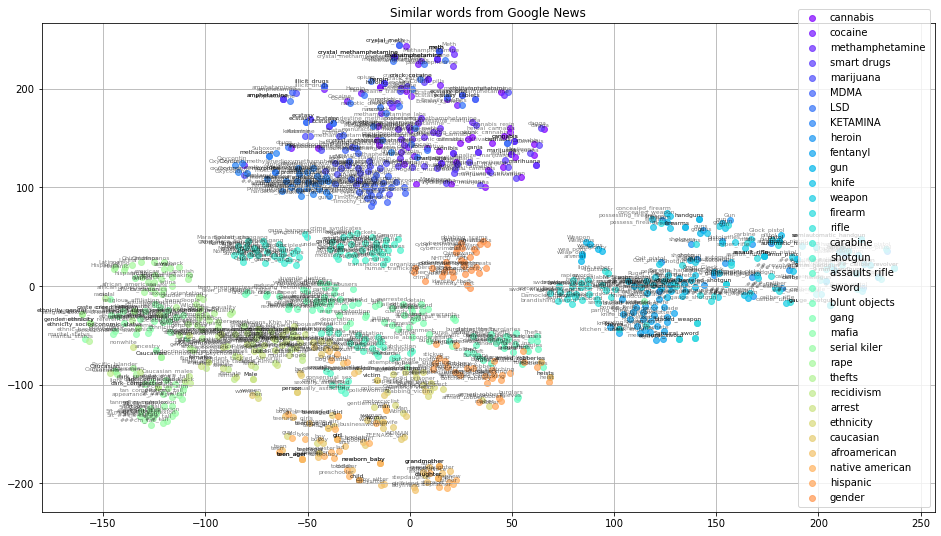

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm



def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=6)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [35]:
frequent_key = []
for word, score  in tf.most_common(10):
    frequent_key.append(word)

In [36]:
frequent_key

['whether',
 'error',
 'illinois',
 'appeal',
 'motion',
 'could',
 'first',
 'counsel',
 'question',
 'appellant']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

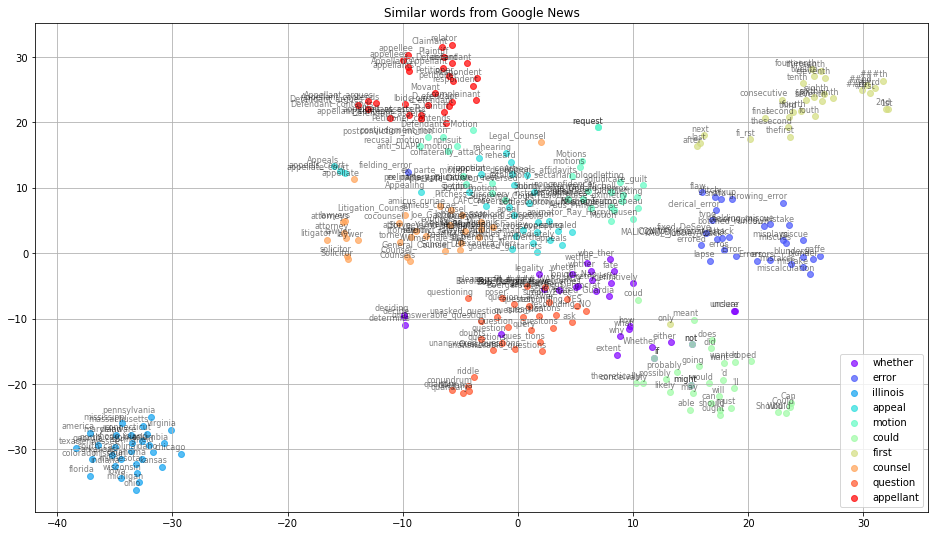

In [37]:
keys = frequent_key

embedding_clusters = []
word_clusters = []
for word in keys:
    try:
        embeddings = []
        words = []
        for similar_word, _ in new_model.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(new_model[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except Exception:
        pass

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_freq.png')